In [1]:
import torch.utils.data
from torch.autograd import Variable
from torchvision import utils
from dataset import Dataset
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = Model()
step = model.load_max_step(('logs/train'))
print 'step = %d' % step

step = 250


In [3]:
loader = torch.utils.data.DataLoader(Dataset('../data/test'), batch_size=16, shuffle=False)
iter_loader = enumerate(loader)

     labels: [3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5]
predictions: [3, 9, 7, 4, 4, 4, 9, 2, 5, 6, 7, 6, 4, 9, 0, 5]


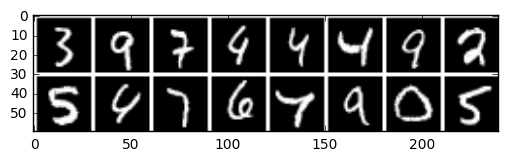

In [14]:
batch_idx, (images, labels) = iter_loader.next()
logits = model(Variable(images, volatile=True))
predictions = logits.data.max(1)[1]

grid_images = utils.make_grid(images)
grid_images = grid_images.numpy()
grid_images = np.transpose(grid_images, axes=[1, 2, 0])

imshow(grid_images)
print '     labels:', labels.tolist()
print 'predictions:', predictions.squeeze().tolist()